In Step 1 we processed and cleaned our data so that we can work on building our model. Before building our model we first need to do some more eda and plot the categorical variables to get more understanding our data. Initially we will download pandas , matplotlib and seaborn for visualization.

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
#reeading the csv file we created in the step 1
df = pd.read_csv('final_df.csv')
df

c:\users\ameya\appdata\local\programs\python\python39\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,CHROM,POS,ID,REF,ALT_1,ALLELEID,CLNDN,CLNREVSTAT,CLNSIG,CLNVC,MC,ORIGIN,numalt,altlen_1,is_snp,CONFLICTING
0,1,871143.0,1127328,G,A,1110870,not_provided,criteria_provided,Benign,single_nucleotide_variant,SO:0001627|intron_variant,1.0,1,0,True,0
1,1,871143.0,1158587,G,T,1131742,not_provided,criteria_provided,Benign,single_nucleotide_variant,SO:0001627|intron_variant,1.0,1,0,True,0
2,1,871215.0,1170011,C,G,1153710,not_provided,criteria_provided,Benign,single_nucleotide_variant,SO:0001819|synonymous_variant,1.0,1,0,True,0
3,1,871215.0,1169806,C,T,1153711,not_provided,criteria_provided,Benign,single_nucleotide_variant,SO:0001819|synonymous_variant,1.0,1,0,True,0
4,1,874456.0,1122639,G,A,1110873,not_provided,criteria_provided,Benign,single_nucleotide_variant,SO:0001583|missense_variant,1.0,1,0,True,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
156817,MT,15852.0,693968,T,G,680858,Leigh_syndrome,criteria_provided,Uncertain_significance,single_nucleotide_variant,SO:0001583|missense_variant,1.0,1,0,True,1
156818,MT,15860.0,693970,A,G,680859,Leigh_syndrome,criteria_provided,Benign,single_nucleotide_variant,SO:0001583|missense_variant,1.0,1,0,True,0
156819,MT,15860.0,693969,A,T,680860,Leigh_syndrome,criteria_provided,Benign,single_nucleotide_variant,SO:0001583|missense_variant,1.0,1,0,True,0
156820,MT,15884.0,143900,G,A,153625,Neoplasm_of_ovary|Leigh_syndrome,criteria_provided,Benign,single_nucleotide_variant,SO:0001583|missense_variant,1.0,1,0,True,0


Before we start any plotting, we need to correct the data type of chromosome column, for our modelling we need to keep it as one data type. We will use pandas replace function to replace X,Y and MT as 24,25,26 respectively. We can also see some values are strings, those can be converted as well

In [3]:
df.CHROM.unique()

array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, '17',
       '18', '19', '20', '21', '22', '23', 'X', 'Y', 'MT'], dtype=object)

In [4]:
#creating dictionary to replace the values
d={'X': 24, 'Y': 25, 'MT': 26, '17':17, '18': 18, '19':19, '20':20, '21': 21, '22':22, '23':23 }

In [5]:
#replacing the values in chromosome column
df.replace({"CHROM": d}, inplace=True)

In [6]:
# checking if the replace method has worked properly
df.CHROM.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26], dtype=int64)

We will create a copy of our dataframe as df1 to work on model building and plotting

### Exploratory Data Analysis

In [7]:
#Creating a copy of dataframe as df1
df1= df.copy()

For some plotting purpose the data is split into isConfliction and notConflicting, to analyse each dataframe individually

In [27]:
#Creating two dataframes as isConflicting and notConflicting
isConflicting = df[df['CONFLICTING'] == 1]
notConflicting = df[df['CONFLICTING'] == 0]

<AxesSubplot:xlabel='count', ylabel='CHROM'>

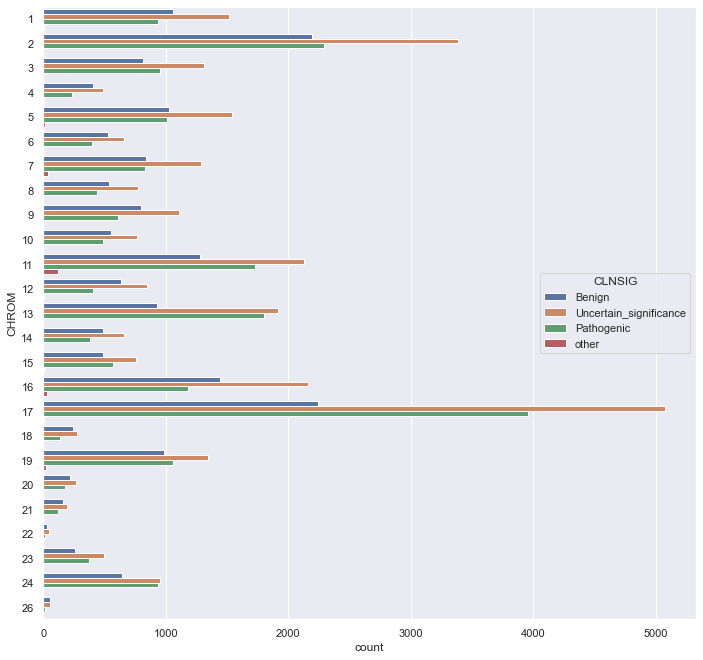

In [30]:
#Every chromosome wise the categories were observed where conflicting is 1
sns.set(rc={'figure.figsize':(11.7,11.27)})
sns.countplot(y="CHROM",hue="CLNSIG", data=isConflicting)

<AxesSubplot:xlabel='count', ylabel='CHROM'>

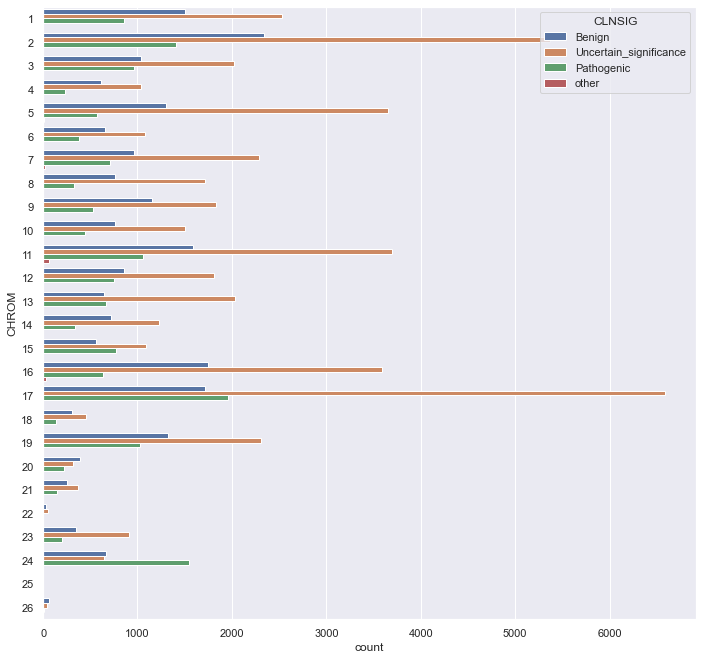

In [32]:
# likewise the nonconflicting database was also observed
sns.set(rc={'figure.figsize':(11.7,11.27)})
sns.countplot(y="CHROM",hue="CLNSIG", data=notConflicting)

From the above countplots we can clearly see chromosome 17 shows high number of Uncertain Significance followed by chromosome 2.
Mitochondrial chromosome shows very less entries

We will also go through the status column in both the dataframes

<AxesSubplot:xlabel='CLNREVSTAT', ylabel='count'>

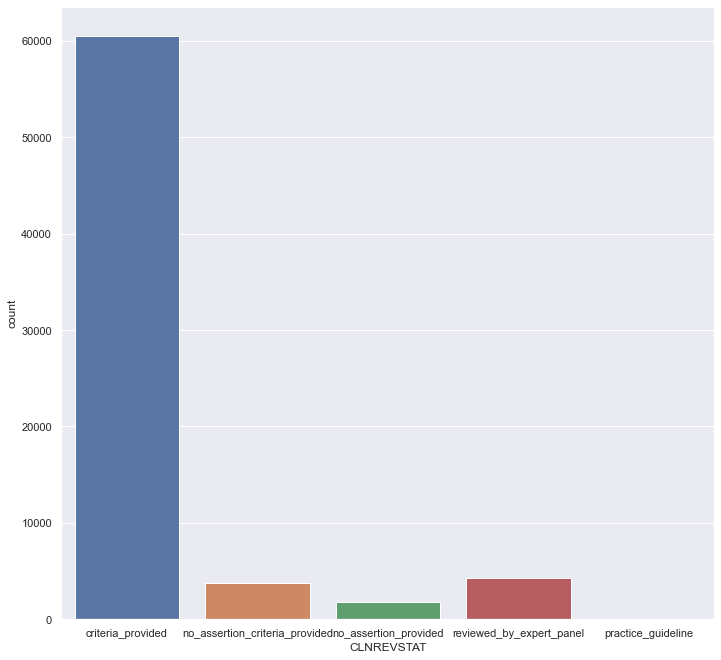

In [33]:
sns.countplot(x="CLNREVSTAT", data=isConflicting)

<AxesSubplot:xlabel='CLNREVSTAT', ylabel='count'>

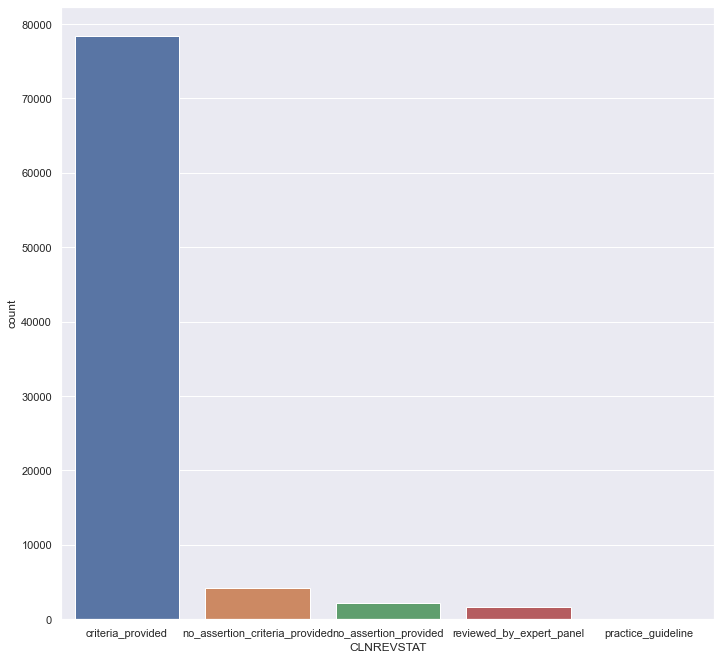

In [34]:
sns.countplot(x="CLNREVSTAT", data=notConflicting)

It is obvious that most of the data provided is considered through criteria provided, our chance to rely on data increases.

We will also check the type of variant in both cases

<AxesSubplot:xlabel='CLNVC', ylabel='count'>

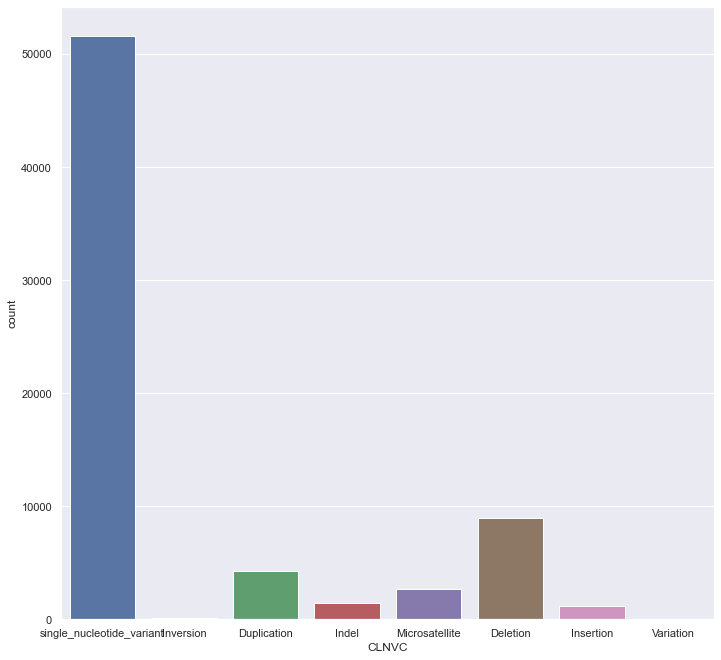

In [35]:
sns.countplot(x="CLNVC", data=isConflicting)

<AxesSubplot:xlabel='CLNVC', ylabel='count'>

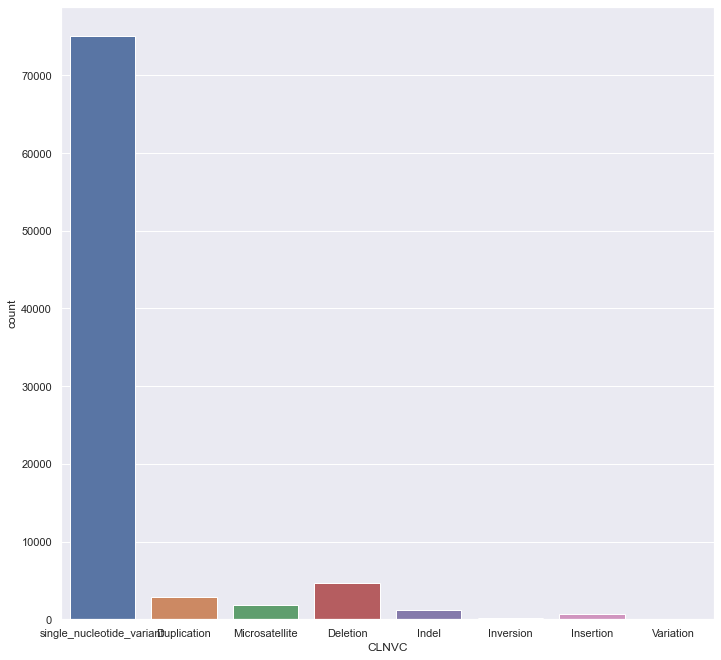

In [36]:
sns.countplot(x="CLNVC", data=notConflicting)

Single nucleotide variation is high in both cases

### Statistical Analysis

We will perform ChiSquare test on the categoral variables. ChiSquare test will let us know which variables are useful (feature selection) for our model.

In [37]:
from sklearn.feature_selection import chi2
X = df1[['CHROM', 'POS', 'CLNDN', 'CLNREVSTAT', 'CLNVC', 'MC','CLNSIG']]
y= df1['CONFLICTING']
chi_scores = chi2(X,y)
chi_scores

(array([6.39123552e+02, 4.34494326e+06, 8.34629812e+04, 4.48875833e+03,
        4.02208384e+03, 1.55600715e+03, 5.66338446e+02]),
 array([5.18268604e-141, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
        0.00000000e+000, 0.00000000e+000, 3.51404610e-125]))

<AxesSubplot:>

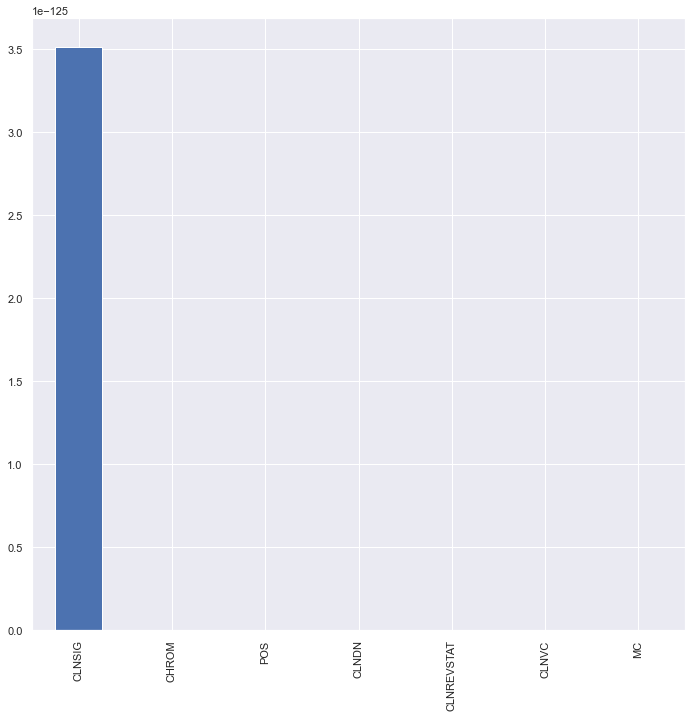

In [38]:
p_values = pd.Series(chi_scores[1],index = X.columns)
p_values.sort_values(ascending = False , inplace = True)
p_values.plot.bar()

We can clearly see CLNSIG column is is independent variable than the rest which are dependent. But for our genralised approach we will continue to keep the column in our model.

Our next approach is to create a very genralised model. Since the categories are too high we will go for Random Forest Classifier, initially. 

Here are few steps to perform processing on the data
1. All the categorical columns will be converted using Label Encoder. (Random Forest wont consider Ordinal Category since it is based on gini impurity)
2. We will split the data into X-train and y_train using sklearn library (70% training ans 30% test)

In [43]:
df1.columns

Index(['CHROM', 'POS', 'ID', 'REF', 'ALT_1', 'ALLELEID', 'CLNDN', 'CLNREVSTAT',
       'CLNSIG', 'CLNVC', 'MC', 'ORIGIN', 'numalt', 'altlen_1', 'is_snp',
       'CONFLICTING'],
      dtype='object')

In [ ]:
from sklearn.preprocessing import LabelEncoder
categ = ['CLNDN', 'CLNREVSTAT','CLNSIG','CLNVC', 'MC', 'REF', 'ALT_1','is_snp','POS']

le = LabelEncoder()
df1[categ] = df1[categ].apply(le.fit_transform)

In [78]:
X = df1[['CHROM', 'POS', 'REF', 'ALT_1', 'CLNDN', 'CLNREVSTAT', 'CLNVC', 'MC', 'ORIGIN', 'numalt', 'altlen_1', 'is_snp']]
y = df1['CONFLICTING']


import numpy as np
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [46]:
X

,CHROM,POS,REF,ALT_1,CLNDN,CLNREVSTAT,CLNVC,MC,ORIGIN,numalt,altlen_1,is_snp
0,1,680,2394,0,11156,0,7,10,1.0,1,0,1
1,1,680,2394,2560,11156,0,7,10,1.0,1,0,1
2,1,681,1083,1709,11156,0,7,11,1.0,1,0,1
3,1,681,1083,2560,11156,0,7,11,1.0,1,0,1
4,1,682,2394,0,11156,0,7,4,1.0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
156817,26,118,3730,1709,6353,0,7,4,1.0,1,0,1
156818,26,119,0,1709,6353,0,7,4,1.0,1,0,1
156819,26,119,0,2560,6353,0,7,4,1.0,1,0,1
156820,26,120,2394,0,7890,0,7,4,1.0,1,0,1


Initially we will keep all the columns and calculate the feature importance, We will remove the features with least importance and again try to check if the score has increased or not.

## Random Forest Classifier

In [47]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=200)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
from sklearn import metrics
  
# using metrics module for accuracy calculation

print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_test, y_pred))

ACCURACY OF THE MODEL:  0.6269900312453504


In [53]:
feature_importance = list(clf.feature_importances_)
columns = X.columns

In [55]:
for i,j in zip(columns,feature_importance):
    print(f'{i} : {j}')

CHROM : 0.08145788905141116
POS : 0.488318737139751
REF : 0.05559380265845534
ALT_1 : 0.04587786672950632
CLNDN : 0.18869662145398883
CLNREVSTAT : 0.015634636661532773
CLNVC : 0.015548379923347058
MC : 0.06345688849972873
ORIGIN : 0.01717981476925915
numalt : 0.0
altlen_1 : 0.019448309839374303
is_snp : 0.008787053273645339


As per our approach of Backward elimination we will remove the features with least importance and check if we can find any increase accuracy of the score. We will remove numalt and is_snp columns and run the model again.

In [80]:
X = df1[['CHROM', 'POS', 'REF', 'ALT_1', 'CLNDN', 'CLNREVSTAT', 'CLNVC', 'MC', 'ORIGIN', 'altlen_1']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [59]:
clf = RandomForestClassifier(n_estimators=200)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_test, y_pred))

ACCURACY OF THE MODEL:  0.6272876060110103


In [60]:
feature_importance = list(clf.feature_importances_)
columns = X.columns
for i,j in zip(columns,feature_importance):
    print(f'{i} : {j}')

CHROM : 0.07713160031676866
POS : 0.48627749722992564
REF : 0.06274784806786918
ALT_1 : 0.05147468388524904
CLNDN : 0.18228230881588264
CLNREVSTAT : 0.016608029193832596
CLNVC : 0.020208736706041182
MC : 0.06229173007603787
ORIGIN : 0.01774797809155903
altlen_1 : 0.023229587616834035


We couldent find much difference in the accuracy. By eliminating the columns. But we will continue to keep the X same and try for more algorithms. Next step we will use one more simple and fast algorithm GaussianNB, which is also commanly used to get some insight for our modelling

## GaussianNB

In [61]:
from sklearn.naive_bayes import GaussianNB

In [62]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)

In [63]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.59483070121368


We can see the accuracy stays near 60%, But we will keep our Focus on Tree Based Models for now

Our next approach is to check the Variance and Bias using Boosting Classifiers. To increase the accuracy of Tree Based Model this classifiers are highly preffered. We will keep some learning rates with constant depth and features and get some insight before creating any final model. Our main focus is to have least Bias

### AdaBoost Classifier

In [81]:
from sklearn.ensemble import AdaBoostClassifier
abc = AdaBoostClassifier(n_estimators=50,
                         learning_rate=1)
# Train Adaboost Classifer
model = abc.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = model.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6260122855867537


AdaBoost Classifier is also giving us 62% accuracy score. Will have a look at CatBoost as well

### CatBoost Classifier

In [82]:
from catboost import CatBoostClassifier
from sklearn.model_selection import GridSearchCV

cbc = CatBoostClassifier()

grid = {'max_depth': [3,4,5],'n_estimators':[20, 40]}

#Instantiate GridSearchCV
gscv = GridSearchCV (estimator = cbc, param_grid = grid, scoring ='accuracy', cv = 5)

#fit the model
gscv.fit(X_train,y_train)

print(gscv.best_estimator_)

#returns the best score
print(gscv.best_score_)

#returns the best parameters
print(gscv.best_params_)

Learning rate set to 0.5
0:	learn: 0.6677260	total: 28.7ms	remaining: 544ms
1:	learn: 0.6601089	total: 53.9ms	remaining: 485ms
2:	learn: 0.6551846	total: 82.4ms	remaining: 467ms
3:	learn: 0.6529684	total: 110ms	remaining: 439ms
4:	learn: 0.6517096	total: 133ms	remaining: 400ms
5:	learn: 0.6507048	total: 157ms	remaining: 367ms
6:	learn: 0.6490232	total: 181ms	remaining: 337ms
7:	learn: 0.6485125	total: 208ms	remaining: 313ms
8:	learn: 0.6477476	total: 235ms	remaining: 288ms
9:	learn: 0.6472104	total: 257ms	remaining: 257ms
10:	learn: 0.6465088	total: 279ms	remaining: 228ms
11:	learn: 0.6461519	total: 302ms	remaining: 201ms
12:	learn: 0.6459356	total: 323ms	remaining: 174ms
13:	learn: 0.6456032	total: 344ms	remaining: 147ms
14:	learn: 0.6453975	total: 363ms	remaining: 121ms
15:	learn: 0.6448223	total: 383ms	remaining: 95.7ms
16:	learn: 0.6444458	total: 407ms	remaining: 71.9ms
17:	learn: 0.6440234	total: 431ms	remaining: 47.8ms
18:	learn: 0.6436325	total: 454ms	remaining: 23.9ms
19:	learn

25:	learn: 0.6408759	total: 584ms	remaining: 314ms
26:	learn: 0.6404803	total: 605ms	remaining: 291ms
27:	learn: 0.6402747	total: 626ms	remaining: 268ms
28:	learn: 0.6399444	total: 646ms	remaining: 245ms
29:	learn: 0.6391803	total: 670ms	remaining: 223ms
30:	learn: 0.6389531	total: 691ms	remaining: 201ms
31:	learn: 0.6381695	total: 714ms	remaining: 178ms
32:	learn: 0.6378426	total: 735ms	remaining: 156ms
33:	learn: 0.6375188	total: 755ms	remaining: 133ms
34:	learn: 0.6373692	total: 773ms	remaining: 110ms
35:	learn: 0.6372853	total: 795ms	remaining: 88.3ms
36:	learn: 0.6369523	total: 818ms	remaining: 66.3ms
37:	learn: 0.6368064	total: 837ms	remaining: 44ms
38:	learn: 0.6364039	total: 859ms	remaining: 22ms
39:	learn: 0.6363313	total: 878ms	remaining: 0us
Learning rate set to 0.5
0:	learn: 0.6683380	total: 29.1ms	remaining: 1.14s
1:	learn: 0.6609714	total: 54.8ms	remaining: 1.04s
2:	learn: 0.6559295	total: 79.6ms	remaining: 981ms
3:	learn: 0.6534268	total: 104ms	remaining: 934ms
4:	learn:

6:	learn: 0.6452008	total: 203ms	remaining: 378ms
7:	learn: 0.6439440	total: 231ms	remaining: 347ms
8:	learn: 0.6433285	total: 257ms	remaining: 314ms
9:	learn: 0.6422183	total: 291ms	remaining: 291ms
10:	learn: 0.6415390	total: 324ms	remaining: 265ms
11:	learn: 0.6408034	total: 356ms	remaining: 238ms
12:	learn: 0.6401665	total: 390ms	remaining: 210ms
13:	learn: 0.6393826	total: 423ms	remaining: 181ms
14:	learn: 0.6390608	total: 451ms	remaining: 150ms
15:	learn: 0.6387454	total: 476ms	remaining: 119ms
16:	learn: 0.6384021	total: 500ms	remaining: 88.3ms
17:	learn: 0.6382181	total: 523ms	remaining: 58.2ms
18:	learn: 0.6379166	total: 549ms	remaining: 28.9ms
19:	learn: 0.6374246	total: 571ms	remaining: 0us
Learning rate set to 0.5
0:	learn: 0.6671916	total: 36.6ms	remaining: 695ms
1:	learn: 0.6591400	total: 69.6ms	remaining: 626ms
2:	learn: 0.6536154	total: 103ms	remaining: 586ms
3:	learn: 0.6511442	total: 136ms	remaining: 545ms
4:	learn: 0.6498226	total: 165ms	remaining: 494ms
5:	learn: 0.

5:	learn: 0.6485365	total: 211ms	remaining: 1.2s
6:	learn: 0.6475870	total: 237ms	remaining: 1.11s
7:	learn: 0.6462469	total: 262ms	remaining: 1.05s
8:	learn: 0.6456235	total: 288ms	remaining: 992ms
9:	learn: 0.6449359	total: 313ms	remaining: 938ms
10:	learn: 0.6444436	total: 337ms	remaining: 889ms
11:	learn: 0.6437220	total: 360ms	remaining: 839ms
12:	learn: 0.6434920	total: 385ms	remaining: 800ms
13:	learn: 0.6429792	total: 410ms	remaining: 761ms
14:	learn: 0.6425500	total: 435ms	remaining: 725ms
15:	learn: 0.6421478	total: 464ms	remaining: 696ms
16:	learn: 0.6417956	total: 490ms	remaining: 662ms
17:	learn: 0.6413450	total: 513ms	remaining: 627ms
18:	learn: 0.6409914	total: 535ms	remaining: 591ms
19:	learn: 0.6405338	total: 557ms	remaining: 557ms
20:	learn: 0.6399659	total: 579ms	remaining: 524ms
21:	learn: 0.6388407	total: 601ms	remaining: 492ms
22:	learn: 0.6385826	total: 623ms	remaining: 460ms
23:	learn: 0.6381756	total: 650ms	remaining: 433ms
24:	learn: 0.6374171	total: 675ms	rem

5:	learn: 0.6461085	total: 200ms	remaining: 467ms
6:	learn: 0.6441735	total: 228ms	remaining: 423ms
7:	learn: 0.6429661	total: 255ms	remaining: 383ms
8:	learn: 0.6422902	total: 279ms	remaining: 341ms
9:	learn: 0.6413970	total: 302ms	remaining: 302ms
10:	learn: 0.6407716	total: 325ms	remaining: 266ms
11:	learn: 0.6404533	total: 349ms	remaining: 232ms
12:	learn: 0.6401410	total: 372ms	remaining: 200ms
13:	learn: 0.6391404	total: 399ms	remaining: 171ms
14:	learn: 0.6385310	total: 430ms	remaining: 143ms
15:	learn: 0.6382048	total: 462ms	remaining: 115ms
16:	learn: 0.6378927	total: 499ms	remaining: 88ms
17:	learn: 0.6377045	total: 531ms	remaining: 59ms
18:	learn: 0.6371788	total: 561ms	remaining: 29.5ms
19:	learn: 0.6368424	total: 586ms	remaining: 0us
Learning rate set to 0.5
0:	learn: 0.6649819	total: 46.3ms	remaining: 880ms
1:	learn: 0.6563103	total: 83ms	remaining: 747ms
2:	learn: 0.6517697	total: 115ms	remaining: 652ms
3:	learn: 0.6491821	total: 146ms	remaining: 583ms
4:	learn: 0.647466

28:	learn: 0.6336956	total: 851ms	remaining: 323ms
29:	learn: 0.6319141	total: 883ms	remaining: 294ms
30:	learn: 0.6313809	total: 909ms	remaining: 264ms
31:	learn: 0.6310269	total: 938ms	remaining: 235ms
32:	learn: 0.6306546	total: 966ms	remaining: 205ms
33:	learn: 0.6299809	total: 995ms	remaining: 176ms
34:	learn: 0.6296817	total: 1.02s	remaining: 146ms
35:	learn: 0.6293662	total: 1.05s	remaining: 117ms
36:	learn: 0.6289827	total: 1.08s	remaining: 87.5ms
37:	learn: 0.6287611	total: 1.1s	remaining: 58.2ms
38:	learn: 0.6284379	total: 1.13s	remaining: 29ms
39:	learn: 0.6281669	total: 1.15s	remaining: 0us
Learning rate set to 0.5
0:	learn: 0.6649819	total: 38ms	remaining: 1.48s
1:	learn: 0.6563103	total: 72.9ms	remaining: 1.39s
2:	learn: 0.6517697	total: 103ms	remaining: 1.26s
3:	learn: 0.6491821	total: 135ms	remaining: 1.22s
4:	learn: 0.6474668	total: 166ms	remaining: 1.16s
5:	learn: 0.6458181	total: 202ms	remaining: 1.14s
6:	learn: 0.6447806	total: 231ms	remaining: 1.09s
7:	learn: 0.644

CatBoost gave us 64% accuracy which gives an insight the trees used were 40 with depth of 5. We will also work on Gradient Boosting Classifier and get some insight

### Gradient Boosting Classifier

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

In [65]:
lr_list = [0.05, 0.075, 0.1, 0.25, 0.5, 0.75, 1]

for learning_rate in lr_list:
    gb_clf = GradientBoostingClassifier(n_estimators=20, learning_rate=learning_rate, max_features=5, max_depth=5, random_state=0)
    gb_clf.fit(X_train, y_train)
    
    
    print("Learning rate: ", learning_rate)
    print("Accuracy score (training): {0:.3f}".format(gb_clf.score(X_train, y_train)))
    print("Accuracy score (test): {0:.3f}".format(gb_clf.score(X_test, y_test)))
    print('______________________________')

Learning rate:  0.05
Accuracy score (training): 0.630
Accuracy score (test): 0.623
______________________________
Learning rate:  0.075
Accuracy score (training): 0.633
Accuracy score (test): 0.626
______________________________
Learning rate:  0.1
Accuracy score (training): 0.639
Accuracy score (test): 0.631
______________________________
Learning rate:  0.25
Accuracy score (training): 0.646
Accuracy score (test): 0.636
______________________________
Learning rate:  0.5
Accuracy score (training): 0.656
Accuracy score (test): 0.642
______________________________
Learning rate:  0.75
Accuracy score (training): 0.662
Accuracy score (test): 0.643
______________________________
Learning rate:  1
Accuracy score (training): 0.665
Accuracy score (test): 0.646
______________________________


As we can see learning rate of 0.5 has shown increase in the accuracy score and the test score. Here the overfitting of the model is lowest. We will try to increase the depth to 7 and check if the accuracy increases with least overfitting

In [66]:
#Increasing the depth to 7
lr_list = [0.05, 0.075, 0.1, 0.25, 0.5, 0.75, 1]

for learning_rate in lr_list:
    gb_clf = GradientBoostingClassifier(n_estimators=20, learning_rate=learning_rate, max_features=5, max_depth=7, random_state=0)
    gb_clf.fit(X_train, y_train)
    
    
    print("Learning rate: ", learning_rate)
    print("Accuracy score (training): {0:.3f}".format(gb_clf.score(X_train, y_train)))
    print("Accuracy score (test): {0:.3f}".format(gb_clf.score(X_test, y_test)))
    print('______________________________')

Learning rate:  0.05
Accuracy score (training): 0.647
Accuracy score (test): 0.634
______________________________
Learning rate:  0.075
Accuracy score (training): 0.653
Accuracy score (test): 0.638
______________________________
Learning rate:  0.1
Accuracy score (training): 0.657
Accuracy score (test): 0.641
______________________________
Learning rate:  0.25
Accuracy score (training): 0.672
Accuracy score (test): 0.648
______________________________
Learning rate:  0.5
Accuracy score (training): 0.680
Accuracy score (test): 0.650
______________________________
Learning rate:  0.75
Accuracy score (training): 0.685
Accuracy score (test): 0.649
______________________________
Learning rate:  1
Accuracy score (training): 0.685
Accuracy score (test): 0.647
______________________________


We do see some increase in accuracy but it leads to some overfitting. We will also try to increase max features and check how our model works, keeing the depth 7.

In [72]:
# increasing the maximum features to 7
lr_list = [0.05, 0.075, 0.1, 0.25, 0.5, 0.75, 1]

for learning_rate in lr_list:
    gb_clf = GradientBoostingClassifier(n_estimators=20, learning_rate=learning_rate, max_features=8, max_depth=10, random_state=0)
    gb_clf.fit(X_train, y_train)
    
    
    print("Learning rate: ", learning_rate)
    print("Accuracy score (training): {0:.3f}".format(gb_clf.score(X_train, y_train)))
    print("Accuracy score (test): {0:.3f}".format(gb_clf.score(X_test, y_test)))
    print('______________________________')

Learning rate:  0.05
Accuracy score (training): 0.687
Accuracy score (test): 0.650
______________________________
Learning rate:  0.075
Accuracy score (training): 0.695
Accuracy score (test): 0.651
______________________________
Learning rate:  0.1
Accuracy score (training): 0.703
Accuracy score (test): 0.655
______________________________
Learning rate:  0.25
Accuracy score (training): 0.725
Accuracy score (test): 0.660
______________________________
Learning rate:  0.5
Accuracy score (training): 0.736
Accuracy score (test): 0.657
______________________________
Learning rate:  0.75
Accuracy score (training): 0.740
Accuracy score (test): 0.654
______________________________
Learning rate:  1
Accuracy score (training): 0.735
Accuracy score (test): 0.655
______________________________


As we can see the variance increaased too much. At every GradientBoosting model we used we can see accuracy score for test decreases after learning rate of 0.25. Since our model has many parameters the variance drastically increases

We will try to reduce the max_feature and depth and try

In [75]:
lr_list = [0.05, 0.075, 0.1, 0.25, 0.5, 0.75, 1]

for learning_rate in lr_list:
    gb_clf = GradientBoostingClassifier(n_estimators=20, learning_rate=learning_rate, max_features=6, max_depth=8, random_state=0)
    gb_clf.fit(X_train, y_train)
    
    
    print("Learning rate: ", learning_rate)
    print("Accuracy score (training): {0:.3f}".format(gb_clf.score(X_train, y_train)))
    print("Accuracy score (test): {0:.3f}".format(gb_clf.score(X_test, y_test)))
    print('______________________________')

Learning rate:  0.05
Accuracy score (training): 0.658
Accuracy score (test): 0.639
______________________________
Learning rate:  0.075
Accuracy score (training): 0.667
Accuracy score (test): 0.646
______________________________
Learning rate:  0.1
Accuracy score (training): 0.670
Accuracy score (test): 0.646
______________________________
Learning rate:  0.25
Accuracy score (training): 0.688
Accuracy score (test): 0.654
______________________________
Learning rate:  0.5
Accuracy score (training): 0.695
Accuracy score (test): 0.652
______________________________
Learning rate:  0.75
Accuracy score (training): 0.701
Accuracy score (test): 0.651
______________________________
Learning rate:  1
Accuracy score (training): 0.699
Accuracy score (test): 0.650
______________________________


##### At learning rate of 0.25 the training data accuracy is 68.8% and test is 65.4%. Our model has some variance but we are trying to keep low variance and low bias. The bias in this case is not much high, like we observed increased depth causes more bias.
We will use grid search cv and carry out the same tuning

In [76]:
parameters = {
    "learning_rate": [0.25],
    "max_depth":[8],
    "max_features":[6],
    "n_estimators":[20]
    }

clf = GridSearchCV(GradientBoostingClassifier(), parameters, cv=5, n_jobs=-1)

clf.fit(X_train, y_train)
print(clf.score(X_train, y_train))
print(clf.score(X_test, y_test))
print(clf.best_params_)

0.6888818036893646
0.65447318638808
{'learning_rate': 0.25, 'max_depth': 8, 'max_features': 6, 'n_estimators': 20}


Hence we have optimised Gradient Boost Algorithm for our dataset.

Also tried KNN Classifier

## KNeighborsClassifier

In [137]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=7)
neigh.fit(X_train, y_train)

y_pred = neigh.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6083703530512041


In [138]:
train_score = []
test_score = []
k_vals = []

for k in range(1, 21):
    k_vals.append(k)
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    
    tr_score = knn.score(X_train, y_train)
    train_score.append(tr_score)
    
    te_score = knn.score(X_test, y_test)
    test_score.append(te_score)

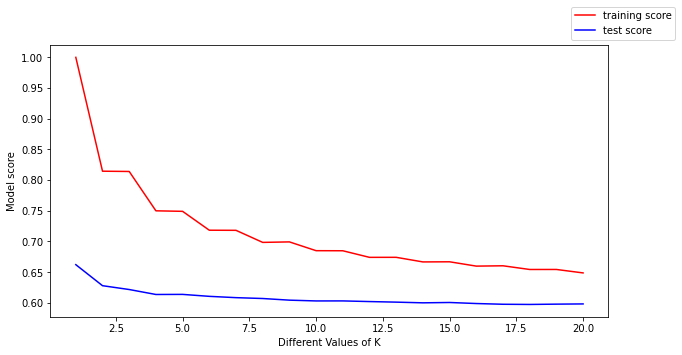

In [139]:
plt.figure(figsize=(10,5))
plt.xlabel('Different Values of K')
plt.ylabel('Model score')
plt.plot(k_vals, train_score, color = 'r', label = "training score")
plt.plot(k_vals, test_score, color = 'b', label = 'test score')
plt.legend(bbox_to_anchor=(1, 1),
           bbox_transform=plt.gcf().transFigure)
plt.show()

We can see the prediction shows very high bias and as the score decreases the bias decreases. There is no meeting point. The model doesnt work properly.